### 判断机器学习算法的性能 

分类的准确度

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets

In [3]:
# 加载手写数字数据集
# 数据集包含手写数字的图像：10个类别，每个类别均指一个数字
# 有64个特征,每个特征值为范围为0-16的整数像素的8x8图像
digits = datasets.load_digits()  # 加载手写数字数据集
digits.keys()   

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
X =digits.data
X.shape  # 总共由1797行数据,64个特征

(1797, 64)

In [6]:
y = digits.target
y.shape  # 1797个标记结果,范围为0-9

(1797,)

In [7]:
# 先观察一部分数据
X[:3]  

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [8]:
y[:40]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [9]:
some_digit = X[1010]  
some_digit
y[1010]

5

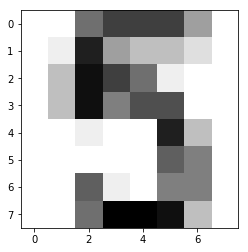

In [10]:
some_digit_img = some_digit.reshape(8,8)  
plt.imshow(some_digit_img, cmap=matplotlib.cm.binary)  # 绘图得出对应数字为5
plt.show()

### 使用自己封装的model_selection模块和kNN算法来实战手写数字数据集

操作:
1.分割训练集和测试集

2.训练数据

3.预测测试集结果

4.计算分类的准确度

In [11]:
from accuracy_score.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=10)

In [15]:
from accuracy_score.kNN import kNNClassifier
from accuracy_score.metrics import accuracy_score
my_knn_clf = kNNClassifier(k=3)

my_knn_clf.fit(X_train, y_train)

y_predict = my_knn_clf.predict(X_test)

print(accuracy_score(y_test, y_predict))   # 调用自己封装的计算准确率函数

my_knn_clf.score(X_test, y_test)  # 模仿sklear将计算准确率函数封装到kNN分类器中

0.9888579387186629


0.9888579387186629

### 使用sklearn实战手写数字数据集

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,test_size=0.2,random_state=10)
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train1, y_train1)

knn_clf.score(X_test1, y_test1)  # 获取算法准确度(评分越高越准确)


0.9888888888888889